# Ames Housing Project Suggestions

In this project I will be exploring the trends in houses price and the categories or features that effect them.

There are alot of fluctuation in house prices depending on where they are, the year built or what type of house it is. In this project target audiences are real estate companies who are looking to help clients estimate their house's price. My goal is to be able to generate a model which is able to predict house prices and from them identify the best factor that will help estimate house prices. 

---

## EDA
- Read the data dictionary.
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [268]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [269]:
train.shape

(2051, 81)

In [270]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

From the info we see that there is a lot of missing value and many of the values are catrgoricals which will be explore later. There is also an ID column which we does not need and will be dropped.

In [271]:
train = train.drop('Id',axis=1)

In [272]:
train = train.drop('PID',axis=1)

In [273]:
train.shape

(2051, 79)

In [274]:
train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

Since looking at the data I noticed that there are spaces in the column names I will be removing them.

In [275]:
def data_cleaning(df):
    for column in df.columns:
        df.rename(columns={column: column.replace(' ', '')}, inplace=True)

In [276]:
data_cleaning(train)

In [277]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'W

Comparing test and train data set to see if the columns matched.

In [278]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [279]:
data_cleaning(test)

In [280]:
set(train.columns).difference(set(test.columns))

{'SalePrice'}

Since there is no difference in the columsn, we will take a closer look at some individual data. Fire we are going to explore the test set to identifying what type of residence I will be predicting using the MS Zoning column.

In [281]:
test['MSZoning'].unique()

array(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)'], dtype=object)

There are 8 type of general zoning of classication for sale:

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
We are only predicitng 
- RM
- RL
- FV
- RH
- C (all)
- I (all)

We will be removing all columns that are not included in the testing data which are A and RP.

In [282]:
train['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [283]:
train = train[train['MSZoning'] != 'A (agr)']

In [284]:
train['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'RH', 'I (all)'], dtype=object)

Now we will look at some outliers in the data.

In [285]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2049.0,57.044900,42.829501,20.0,20.00,50.0,70.0,190.0
LotFrontage,1719.0,69.016289,23.233485,21.0,58.00,68.0,80.0,313.0
LotArea,2049.0,10052.663738,6728.765569,1300.0,7500.00,9405.0,11500.0,159000.0
OverallQual,2049.0,6.117130,1.417987,1.0,5.00,6.0,7.0,10.0
OverallCond,2049.0,5.563690,1.103514,1.0,5.00,5.0,6.0,9.0
YearBuilt,2049.0,1971.728648,30.186005,1872.0,1954.00,1974.0,2001.0,2010.0
YearRemod/Add,2049.0,1984.222060,21.021682,1950.0,1965.00,1993.0,2004.0,2010.0
MasVnrArea,2027.0,99.794277,175.021411,0.0,0.00,0.0,161.5,1600.0
BsmtFinSF1,2048.0,442.732422,461.222012,0.0,0.00,368.5,734.0,5644.0
BsmtFinSF2,2048.0,48.005859,165.074675,0.0,0.00,0.0,0.0,1474.0


#### Identifying Outliers
- Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
- Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

In [286]:
#identifying outliers in salesprice using IQR
q1, q3= np.percentile(train.SalePrice,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [287]:
print('Lower Bound',lower_bound)
print('Upper Bound',upper_bound)
#according to this method any SalePrice outside 3718.75 and 340168.75 is an outliers

Lower Bound 3750.0
Upper Bound 340150.0


In [288]:
#identifying outliers in salesprice using Z score
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [289]:
print(detect_outlier(train.SalePrice))
#according to the Z Score calculation the list below are the outliers data in SalePrice

[465000, 501837, 545224, 556581, 457347, 430000, 460000, 441929, 421250, 446261, 451950, 552000, 468000, 500067, 538000, 455000, 450000, 475000, 426000, 466500, 475000, 555000, 438780, 500000, 440000, 535000, 445000, 611657, 584500, 485000, 582933, 591587, 425000]


We were able to identify the outliers, however we are not sure if we should remove the outliers here yet. Since it may not be an actual outliers comparing to other data in the data set. For now we will keep the data on hold and might remove them in future notebook if deem necessary.

---

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

In [290]:
train.isnull().sum().sort_values(ascending=False)[0:30]

PoolQC          2040
MiscFeature     1984
Alley           1909
Fence           1649
FireplaceQu      998
LotFrontage      330
GarageFinish     114
GarageQual       114
GarageYrBlt      114
GarageCond       114
GarageType       113
BsmtExposure      56
BsmtFinType2      54
BsmtCond          53
BsmtQual          53
BsmtFinType1      53
MasVnrArea        22
MasVnrType        22
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
GarageCars         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
3SsnPorch          0
ScreenPorch        0
FullBath           0
HalfBath           0
dtype: int64

There are 26 coloumns with null values with 4 having more than 1000 missng values. This means that these four are likely to be a poor predictor for the sale price due to the lack of information. We will create a new dataframe without them incase we might need them later on with more exploratio, which are:
- PoolQc indicate pool quality with 2040 missing values
- MiscFeature indicate miscellaneous feature not covered in other categories like elevator, shed or tennis court with 1984 missing values
- Alley indicate type of alley access to the property with 1909 missing values
- Fence indicate fence quality with 1649 missing values

Looking at the other columns with null value. Through comparing each column with the data dictionary we see that:
Not actually missing the house just does not have that ammenities:
- FireplaceQu indicate Fireplace Quality meaning the 690 houses may not have a fireplace
- GarageFinish, GarageQual, GarageYrBlt, GarageCond, GarageType indicate different condition of the property garage and if they have it, the data suggest that there are 114 houses with no garage that present a null value
- BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, BsmtFinType1 indicate different type and area of basement that they property may have the data showed arounf 50 houses have no basement area.
- While BsmtFullBath, BsmtHalfBath indicate whether a basement have a bath with 2 does not have a bath or half bath in the basement

Actual missing values to explore and correct by using data mean or median:
- Lot Frontage indicate Linear feet of street connected to property meaning 330 housses does not have space between their house and the strees, however it could be actual missing value which can be filled by the mean
- MasVnrArea and MasVnrType indicate masonary veneer type with 22 missing value
- Another garage values GarageArea and GarageCars have 1 null value of the area of the garage and the number of cars
- Anoter basement values BsmtUnfSF, BsmtFinSF2, BsmtFinSF1 indicate if the basement is finished with 1 null value.

We will start of by looking at the columns with one null values first and see if we can drop that row.

In [291]:
null_columns=train.columns[train.isnull().any()]
train[train['BsmtUnfSF'].isnull()][null_columns]
#we will be dropping this row since most of the data is null

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
1327,99.0,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Detchd,1946.0,Unf,1.0,280.0,TA,TA,NaN,MnPrv,NaN


In [292]:
train = train.drop([1327])
train.reset_index(drop=True,inplace=True)
train.iloc[1326:1328]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
1326,60,RL,84.0,9660,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2006,WD,286000
1327,60,RL,88.0,10179,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,7,2009,WD,189500


In [293]:
#let's see what's left in the null
train.isnull().sum().sort_values(ascending=False)[0:30]

PoolQC          2039
MiscFeature     1983
Alley           1908
Fence           1649
FireplaceQu      997
LotFrontage      330
GarageFinish     114
GarageYrBlt      114
GarageQual       114
GarageCond       114
GarageType       113
BsmtExposure      55
BsmtFinType2      53
BsmtFinType1      52
BsmtCond          52
BsmtQual          52
MasVnrType        22
MasVnrArea        22
GarageArea         1
GarageCars         1
BsmtHalfBath       1
BsmtFullBath       1
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
TotRmsAbvGrd       0
MSSubClass         0
dtype: int64

In [294]:
null_columns=train.columns[train.isnull().any()]
train[train['BsmtFullBath'].isnull()][null_columns]
#we will be dropping this row since most of the data is null

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
615,123.0,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Attchd,1959.0,Unf,2.0,624.0,TA,TA,NaN,NaN,NaN


In [295]:
train = train.drop([615])
train.reset_index(drop=True,inplace=True)
train.iloc[614:616]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
614,20,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2007,New,208900
615,160,FV,30.0,3180,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2008,WD,146000


In [296]:
#let's see what's left in the null
train.isnull().sum().sort_values(ascending=False)[0:20]

PoolQC          2038
MiscFeature     1982
Alley           1907
Fence           1648
FireplaceQu      997
LotFrontage      330
GarageFinish     114
GarageYrBlt      114
GarageQual       114
GarageCond       114
GarageType       113
BsmtExposure      54
BsmtFinType2      52
BsmtFinType1      51
BsmtCond          51
BsmtQual          51
MasVnrType        22
MasVnrArea        22
GarageArea         1
GarageCars         1
dtype: int64

In [297]:
null_columns=train.columns[train.isnull().any()]
train[train['GarageArea'].isnull()][null_columns]
#we will be dropping this row since most of the data is null

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
1708,50.0,NaN,None,0.0,Gd,TA,No,ALQ,Unf,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MnPrv,NaN


In [298]:
train = train.drop([1708])
train.reset_index(drop=True,inplace=True)
train.iloc[1707:1709]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
1707,20,RL,60.0,8430,Pave,NaN,Reg,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,124000
1708,20,RL,66.0,12778,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,1,2006,WD,139500


In [299]:
#let's see what's left in the null
train.isnull().sum().sort_values(ascending=False)[0:20]

PoolQC          2037
MiscFeature     1981
Alley           1906
Fence           1648
FireplaceQu      996
LotFrontage      330
GarageType       113
GarageYrBlt      113
GarageQual       113
GarageCond       113
GarageFinish     113
BsmtExposure      54
BsmtFinType2      52
BsmtCond          51
BsmtFinType1      51
BsmtQual          51
MasVnrArea        22
MasVnrType        22
BedroomAbvGr       0
BsmtFullBath       0
dtype: int64

Now we will be dealing with columns that have larger null values below:
- Columns like Basement, MasVnr, Garage Fireplace and pool are categorical data which we fill the nan with None values
- In other columns like LotFrontage we will filled with values that are approproate like the mean or median.

In [300]:
def change_to_none(column):
    train[column] = train[column].replace(np.nan, 'None')
    return train[column].unique()

In [301]:
change_to_none('MasVnrType')

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [302]:
print(change_to_none('BsmtQual'))
print(change_to_none('BsmtFinType2'))  
print(change_to_none('BsmtCond'))   
print(change_to_none('BsmtFinType1'))     
print(change_to_none('BsmtExposure'))

['TA' 'Gd' 'Fa' 'None' 'Ex' 'Po']
['Unf' 'Rec' 'None' 'BLQ' 'GLQ' 'LwQ' 'ALQ']
['TA' 'Gd' 'None' 'Fa' 'Po' 'Ex']
['GLQ' 'Unf' 'ALQ' 'Rec' 'None' 'BLQ' 'LwQ']
['No' 'Gd' 'Av' 'None' 'Mn']


In [303]:
print(change_to_none('GarageType'))       
print(change_to_none('GarageQual'))    
print(change_to_none('GarageCond'))     
print(change_to_none('GarageFinish'))     

['Attchd' 'Detchd' 'BuiltIn' 'Basment' 'None' '2Types' 'CarPort']
['TA' 'Fa' 'None' 'Gd' 'Ex' 'Po']
['TA' 'Fa' 'None' 'Gd' 'Ex' 'Po']
['RFn' 'Unf' 'Fin' 'None']


In [304]:
print(change_to_none('FireplaceQu'))

['None' 'TA' 'Gd' 'Po' 'Ex' 'Fa']


In [305]:
#larger categorical null value to none
print(change_to_none('PoolQC'))      
print(change_to_none('MiscFeature'))    
print(change_to_none('Alley'))      
print(change_to_none('Fence'))   

['None' 'Fa' 'Gd' 'Ex' 'TA']
['None' 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
['None' 'Pave' 'Grvl']
['None' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


In [306]:
#let's see what's left in the null
train.isnull().sum().sort_values(ascending=False)[0:5]
#these are all numericals null values

LotFrontage     330
GarageYrBlt     113
MasVnrArea       22
KitchenAbvGr      0
GarageType        0
dtype: int64

For each column we will be deciding if we want to use th emean or median to replace the null values.

In [307]:
train.LotFrontage.unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37.,  38., 129., 115.,  47., 114., 104.,  46., 121.,
       124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138., 111.,
        25.,  33., 200., 150., 117., 153., 116., 135.])

In [308]:
train.LotFrontage.median() #Since the mean and median are similar we will be using the median
#However, since inputing the LotFrontge median might skew the data we might come back at a later time
#Currently the null data is only a small percentage of the data as a whole we are not expecting any influence over the predictions.

68.0

In [309]:
train.LotFrontage.mean()

68.97843822843822

In [310]:
train['LotFrontage'] = train['LotFrontage'].replace(np.nan, train.LotFrontage.median())

In [311]:
train.MasVnrArea.unique()[:10]

array([289., 132.,   0.,  82., 180., 192., 232., 456., 148.,  nan])

In [312]:
train.MasVnrArea.median() #for MasVnrArea we will be using the median

0.0

In [313]:
train.MasVnrArea.mean()

99.94219367588933

In [314]:
train['MasVnrArea'] = train['MasVnrArea'].replace(np.nan, train.MasVnrArea.median())

In [315]:
train.GarageYrBlt.unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [316]:
train.YearBuilt.unique()

array([1976, 1996, 1953, 2006, 1900, 1966, 2005, 1959, 1952, 1969, 1971,
       1880, 1999, 2007, 2004, 1916, 1963, 1977, 2009, 1968, 2000, 1992,
       1955, 1961, 1965, 1937, 1895, 1949, 1981, 1929, 1995, 1958, 1973,
       1994, 1978, 1954, 1935, 1941, 1931, 2003, 1928, 1970, 1951, 1920,
       1930, 1924, 1927, 1960, 1925, 1910, 2008, 1915, 1997, 1956, 1979,
       1964, 2001, 1972, 1957, 1939, 1962, 1947, 1940, 1932, 1967, 1993,
       1875, 1912, 2010, 1987, 1918, 1988, 1922, 1926, 1984, 1942, 1890,
       2002, 1975, 1998, 1936, 1938, 1985, 1923, 1948, 1950, 1980, 1991,
       1917, 1986, 1946, 1885, 1914, 1896, 1983, 1921, 1945, 1901, 1990,
       1974, 1913, 1905, 1982, 1919, 1872, 1892, 1934, 1879, 1893, 1898,
       1911, 1908, 1989], dtype=int64)

Since looking at the data the Year Build data and GarageYrBlt are similar we decide to only keep one column, meaning we will ve droping the GarageYRBlt as it have more missing values.

In [317]:
train.drop(['GarageYrBlt'],axis=1,inplace=True)
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

In [318]:
#let's see what's left in the null
train.isnull().sum().sort_values(ascending=False)[0:5] #no null values

MSSubClass     0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
dtype: int64

In [319]:
train.to_csv('train_clean.csv')

---

## Exploratory Visualizations
- Look at distributions.
- Look at correlations.
- Look at relationships to target (scatter plots for continuous, box plots for categorical).

In [320]:
corr = train.corr()
corr.sort_values(by='SalePrice',ascending=False)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.088980,0.328497,0.298990,0.801281,-0.099361,0.572133,0.548960,0.503919,0.423699,0.015936,...,0.326370,0.331485,-0.135069,0.048658,0.134381,0.023044,-0.007558,0.030059,-0.016019,1.000000
OverallQual,0.032149,0.191675,0.116076,1.000000,-0.086944,0.604180,0.583858,0.430456,0.277121,-0.029638,...,0.255938,0.311598,-0.152739,0.031651,0.047660,0.006286,0.021805,0.014970,-0.013792,0.801281
GrLivArea,0.069491,0.348169,0.320106,0.573204,-0.113229,0.261317,0.321645,0.387230,0.218220,0.001656,...,0.272676,0.337594,-0.008713,0.024800,0.102974,0.113838,0.114517,0.048158,-0.015835,0.698028
GarageArea,-0.108823,0.340260,0.265386,0.566143,-0.139223,0.487124,0.398386,0.380456,0.331859,0.013169,...,0.245385,0.246602,-0.111679,0.043887,0.070958,0.045867,0.033611,0.009366,-0.004205,0.650596
GarageCars,-0.049823,0.281728,0.217625,0.589974,-0.169596,0.542468,0.441426,0.356452,0.260725,-0.002191,...,0.240461,0.215511,-0.138964,0.028336,0.053411,0.021533,0.002991,0.020385,-0.010642,0.648925
TotalBsmtSF,-0.230035,0.341747,0.291913,0.545253,-0.161270,0.409931,0.307454,0.403255,0.538325,0.085839,...,0.223302,0.263727,-0.086722,0.060155,0.075320,0.061524,0.125789,0.001713,-0.005598,0.630258
1stFlrSF,-0.246674,0.425560,0.370128,0.488210,-0.155864,0.328212,0.245433,0.392777,0.471226,0.097697,...,0.231434,0.247208,-0.043936,0.068069,0.090992,0.131718,0.141404,0.025274,-0.007369,0.622028
YearBuilt,0.035181,0.105537,0.038455,0.604180,-0.372041,1.000000,0.630044,0.320081,0.275231,-0.021532,...,0.216264,0.209012,-0.379014,0.015909,-0.038506,0.003601,0.000440,-0.008947,-0.004326,0.572133
YearRemod/Add,0.043090,0.083564,0.052391,0.583858,0.041164,0.630044,1.000000,0.203767,0.165749,-0.057509,...,0.215137,0.263934,-0.238937,0.040324,-0.041788,-0.022535,-0.001861,0.009790,0.042230,0.548960
FullBath,0.142212,0.138392,0.121906,0.516944,-0.222842,0.481952,0.470323,0.233227,0.075351,-0.074144,...,0.175631,0.239603,-0.126276,0.027953,-0.014305,0.010492,0.003310,0.048221,0.006648,0.536720


Text(0.5, 1, 'Housing Project Correlation heatmap')

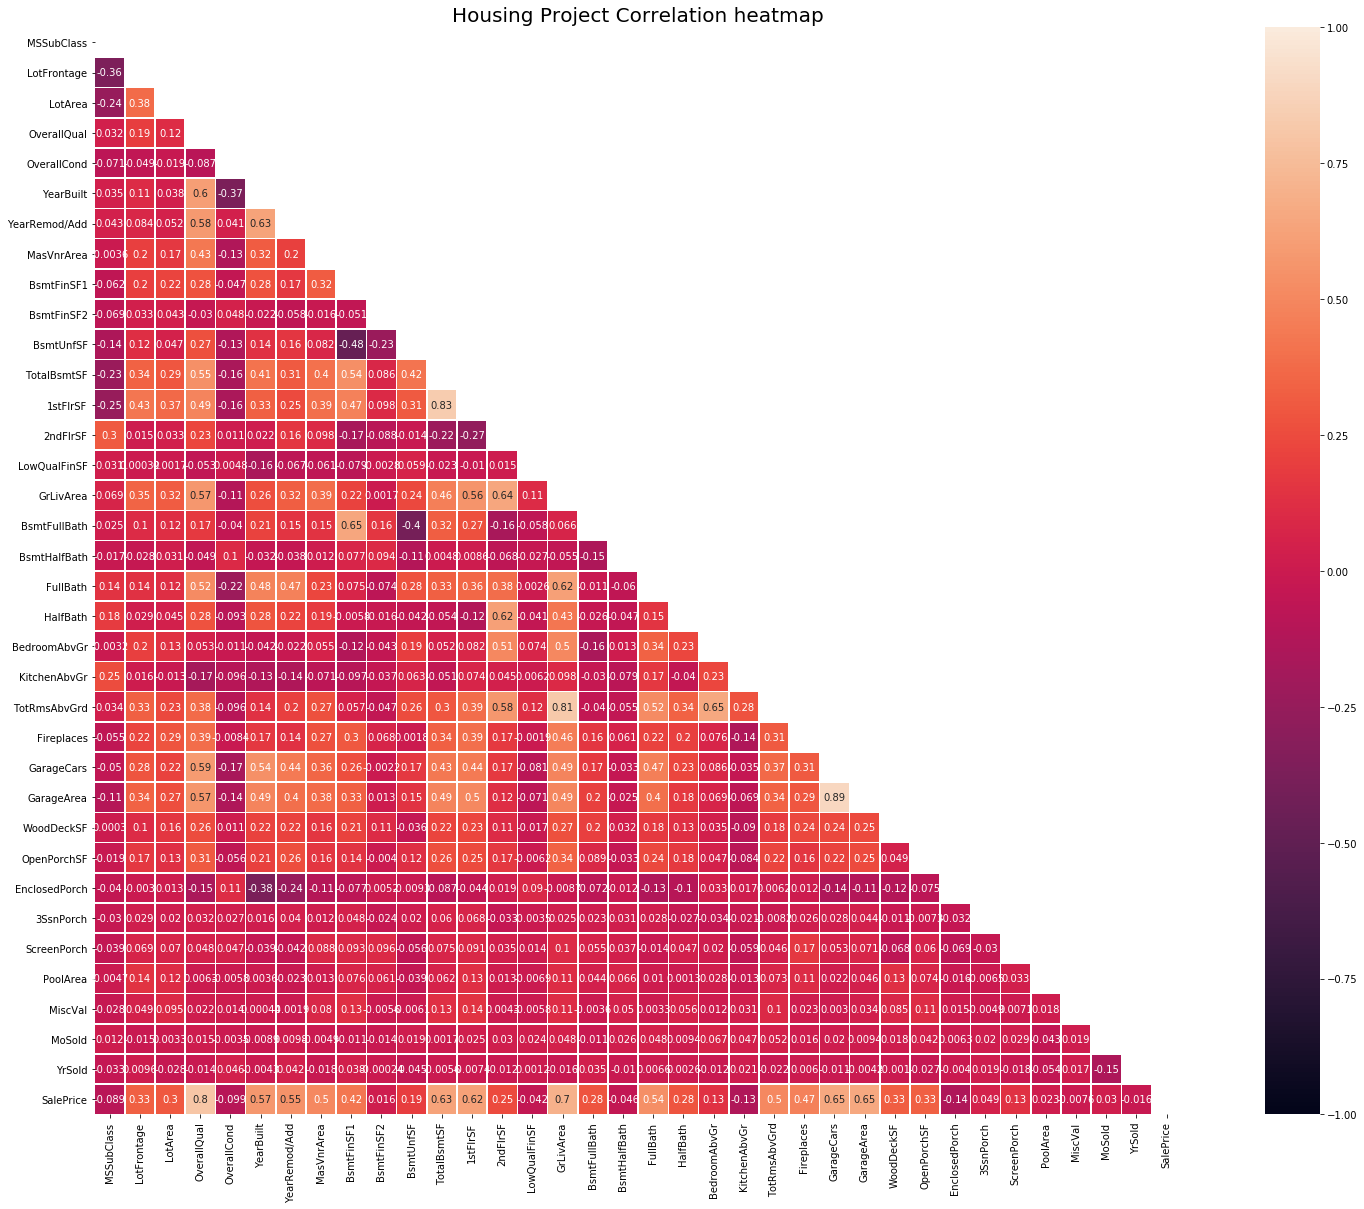

In [321]:
fig, ax = plt.subplots(figsize=(30,20))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask=mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)
ax.set_title("Housing Project Correlation heatmap",fontsize=20)

In [322]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

We will be looking at many correlations between the features and the SalePrice and correlation between the features aswell to try and idetify which fetaures would make the best predictors.

In [323]:
#sns.pairplot(train)

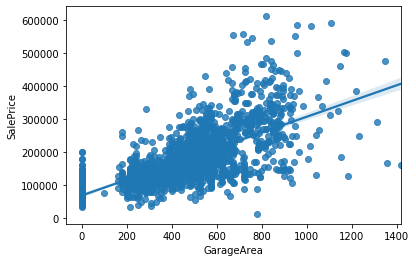

In [324]:
#looking into correlation with SalePrice to find outliers
#There is a high correlation with GarageArea (0.65)
sns.regplot(x='GarageArea',y='SalePrice',data=train)

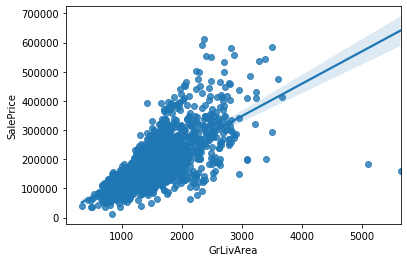

In [325]:
#There is a high correlation with GrLivArea (0.7)
sns.regplot(x='GrLivArea',y='SalePrice',data=train)
#notice that there is an outliers where GrLivArea is above 4000

From the scatter plot above we were able to identify some outliers the most prominent one is the 4000 Living area so we will remove that first.

In [326]:
train = train[train.GrLivArea < 4000]

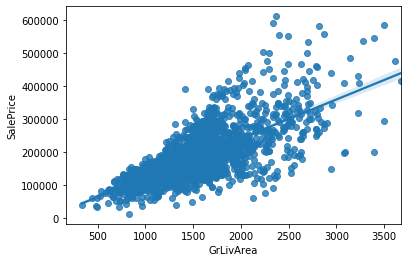

In [327]:
sns.regplot(x='GrLivArea',y='SalePrice',data=train)

In [328]:
#update train set
train.to_csv('train_clean.csv')

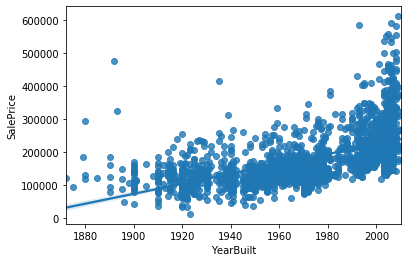

In [329]:
sns.regplot(x='YearBuilt',y='SalePrice',data=train)

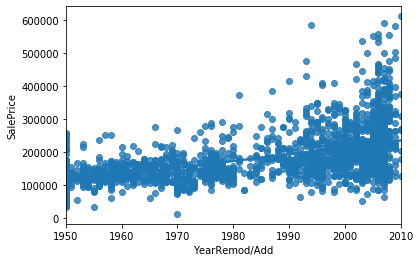

In [330]:
sns.regplot(x='YearRemod/Add',y='SalePrice',data=train)

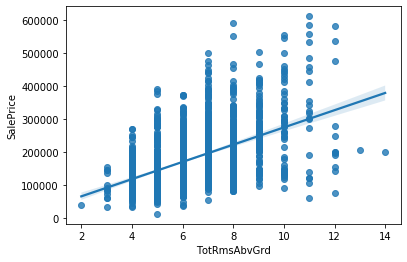

In [331]:
sns.regplot(x='TotRmsAbvGrd',y='SalePrice',data=train)

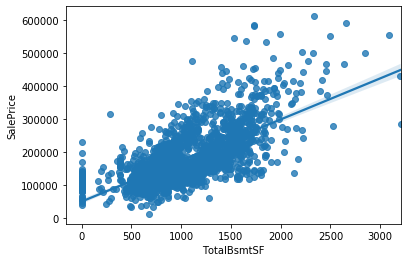

In [332]:
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=train)

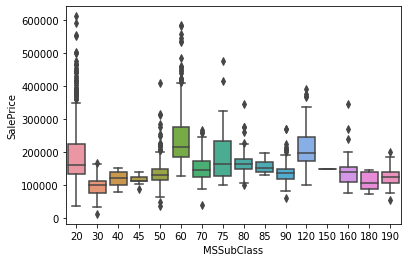

In [333]:
sns.boxplot(x='MSSubClass',y='SalePrice',data=train)

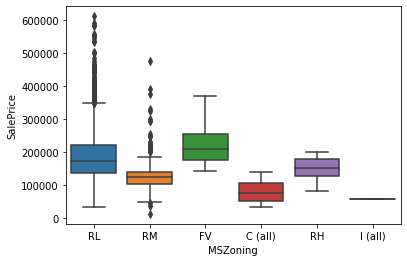

In [334]:
sns.boxplot(x='MSZoning',y='SalePrice',data=train)

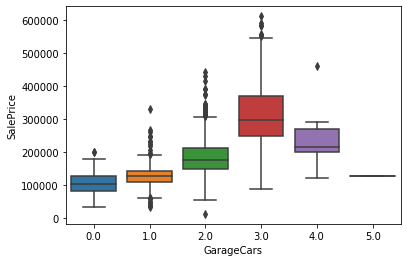

In [335]:
sns.boxplot(x='GarageCars',y='SalePrice',data=train)

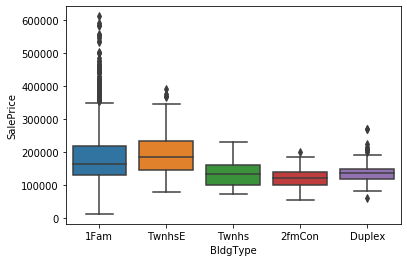

In [336]:
sns.boxplot(x='BldgType',y='SalePrice',data=train)

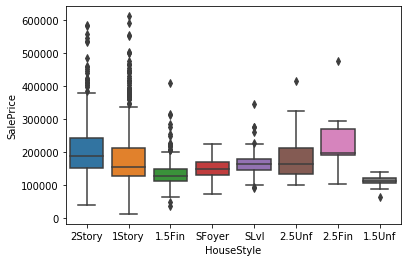

In [337]:
sns.boxplot(x='HouseStyle',y='SalePrice',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

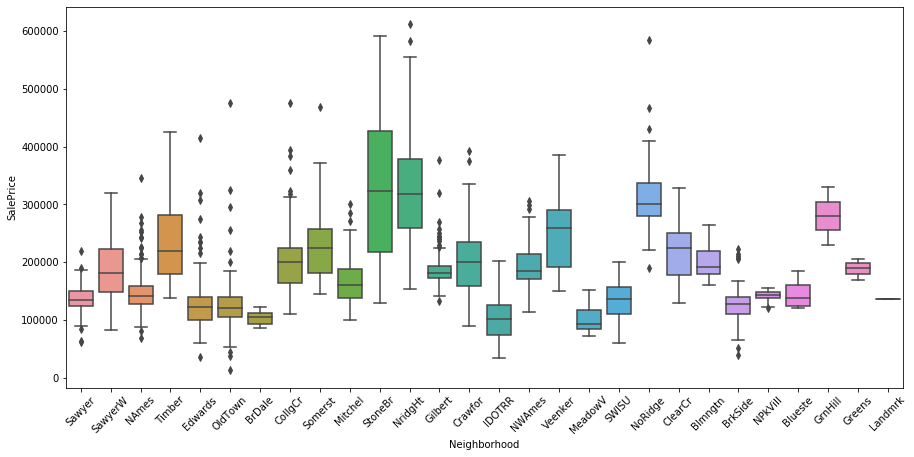

In [338]:
fig,ax = plt.subplots(figsize=(15,7))
sns.boxplot(x='Neighborhood',y='SalePrice',data=train)
plt.xticks(rotation = 45)

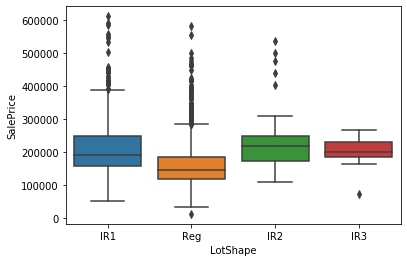

In [339]:
sns.boxplot(x='LotShape',y='SalePrice',data=train)

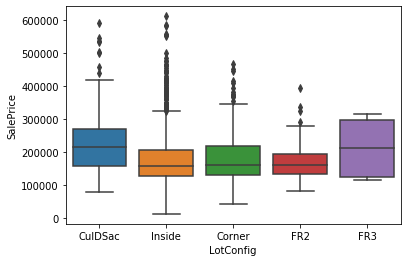

In [340]:
sns.boxplot(x='LotConfig',y='SalePrice',data=train)

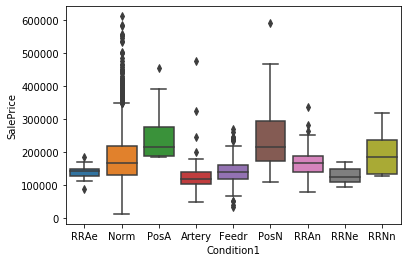

In [341]:
sns.boxplot(x='Condition1',y='SalePrice',data=train)

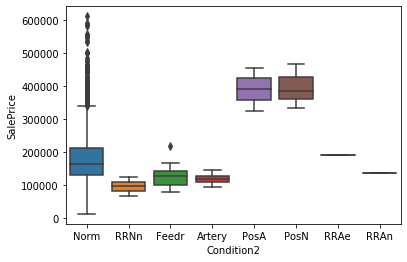

In [342]:
sns.boxplot(x='Condition2',y='SalePrice',data=train)

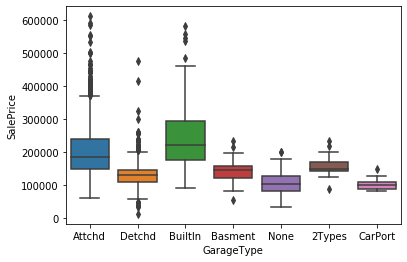

In [343]:
sns.boxplot(x='GarageType',y='SalePrice',data=train)

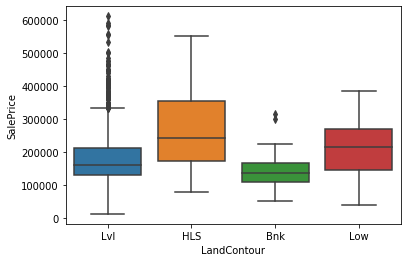

In [344]:
sns.boxplot(x='LandContour',y='SalePrice',data=train)

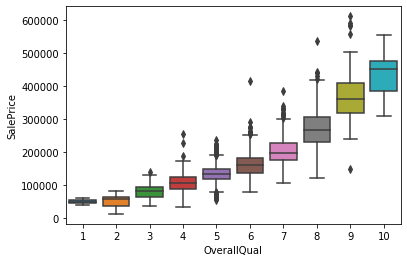

In [345]:
sns.boxplot(x='OverallQual',y='SalePrice',data=train)

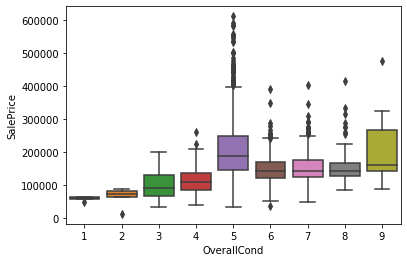

In [346]:
sns.boxplot(x='OverallCond',y='SalePrice',data=train)    

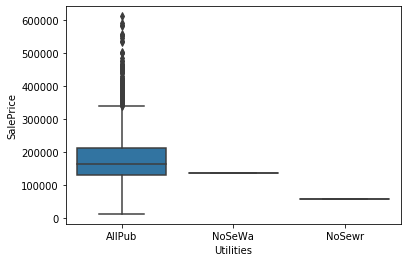

In [347]:
sns.boxplot(x='Utilities',y='SalePrice',data=train)

---

## Pre-processing

Through feature enginnering I have deleted the Garage Built year and some outliers during the EDA process. Now I will be making dummies for categoricals data and cleaning the test dataste and dummy it as well. If there are any additional changes or outliers removal it will be done in this section:

### Clean Test Data

In [348]:
test = pd.read_csv('datasets/test.csv')

In [349]:
test.shape

(879, 80)

In [350]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [351]:
data_cleaning(test)

In [352]:
test.isnull().sum().sort_values(ascending=False)[0:30]

PoolQC          875
MiscFeature     838
Alley           821
Fence           707
FireplaceQu     422
LotFrontage     160
GarageYrBlt      45
GarageFinish     45
GarageQual       45
GarageCond       45
GarageType       44
BsmtFinType1     25
BsmtQual         25
BsmtCond         25
BsmtExposure     25
BsmtFinType2     25
Electrical        1
MasVnrType        1
MasVnrArea        1
KitchenAbvGr      0
TotRmsAbvGrd      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
KitchenQual       0
Id                0
Functional        0
dtype: int64

In [353]:
test.drop(['GarageYrBlt'],axis=1,inplace=True)
test.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Woo

In [354]:
test['MasVnrArea'] = test['MasVnrArea'].replace(np.nan, train.MasVnrArea.median())

In [355]:
test['MasVnrArea'] = test['MasVnrArea'].replace(np.nan, train.MasVnrArea.median())

In [356]:
change_to_none('MasVnrType')
change_to_none('PoolQC')
change_to_none('Alley')
change_to_none('Fence')
change_to_none('FireplaceQu')
change_to_none('GarageFinish')
change_to_none('GarageQual')
change_to_none('GarageCond')
change_to_none('BsmtExposure')
change_to_none('BsmtQual')
change_to_none('BsmtCond')
change_to_none('BsmtFinType1')
change_to_none('BsmtFinType2')
change_to_none('Electrical')
change_to_none('GarageType')
change_to_none('MiscFeature')

array(['None', 'Shed', 'TenC', 'Gar2', 'Othr'], dtype=object)

In [357]:
test.isnull().sum().sort_values(ascending=False)[0:5]

PoolQC         875
MiscFeature    838
Alley          821
Fence          707
FireplaceQu    422
dtype: int64

In [358]:
test.shape

(879, 79)

In [359]:
test.to_csv('test_clean.csv', index=False)

### Making dummies

We will be separating the data in to numerics and object dataframe for easier manipulation.

We will start with the train set.

In [388]:
train = pd.read_csv('datasets/train_clean.csv')

In [389]:
train.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,0,60,RL,68.0,13517,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,3,2010,WD,130500
1,1,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,4,2009,WD,220000
2,2,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,1,2010,WD,109000
3,3,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2010,WD,174000
4,4,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,3,2010,WD,138500


In [390]:
#drop Unnamed: 0
train = train.drop(['Unnamed: 0'],axis=1)

In [391]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2044 non-null   int64  
 1   MSZoning       2044 non-null   object 
 2   LotFrontage    2044 non-null   float64
 3   LotArea        2044 non-null   int64  
 4   Street         2044 non-null   object 
 5   Alley          2044 non-null   object 
 6   LotShape       2044 non-null   object 
 7   LandContour    2044 non-null   object 
 8   Utilities      2044 non-null   object 
 9   LotConfig      2044 non-null   object 
 10  LandSlope      2044 non-null   object 
 11  Neighborhood   2044 non-null   object 
 12  Condition1     2044 non-null   object 
 13  Condition2     2044 non-null   object 
 14  BldgType       2044 non-null   object 
 15  HouseStyle     2044 non-null   object 
 16  OverallQual    2044 non-null   int64  
 17  OverallCond    2044 non-null   int64  
 18  YearBuil

In [392]:
#MSSubCLass should be an object becuase each value represent a category
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})

In [393]:
train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,...,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000
mean,68.672211,9996.440313,6.115460,5.562622,1971.735812,1984.202055,97.976027,438.607632,48.099804,568.483855,...,93.698141,47.158023,22.479452,2.600294,16.568004,2.171233,43.433953,6.225538,2007.776908,181624.901663
std,20.520448,6547.499279,1.413305,1.103766,30.175675,21.015873,172.078585,439.946793,165.222515,444.886559,...,128.273247,65.512319,59.738614,25.272344,57.464256,36.341355,435.007394,2.742589,1.313410,79206.225629
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,60.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,220.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129887.500000
50%,68.000000,9402.500000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,475.500000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,78.000000,11500.000000,7.000000,6.000000,2001.000000,2004.000000,158.500000,733.250000,0.000000,811.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,12500.000000,12.000000,2010.000000,611657.000000


In [394]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train_object = train.select_dtypes(exclude=numerics)
train_object.head()
#this dataset will be use to make dummies

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType
0,SC60,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,None,Attchd,RFn,TA,TA,Y,None,None,None,WD
1,SC60,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,...,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD
2,SC20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,None,Detchd,Unf,TA,TA,Y,None,None,None,WD
3,SC60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,None,BuiltIn,Fin,TA,TA,Y,None,None,None,WD
4,SC50,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,...,None,Detchd,Unf,TA,TA,N,None,None,None,WD


In [395]:
train_numeric = train.select_dtypes(include=numerics)
train_numeric.head()
#for later concatnation

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,68.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,...,0,44,0,0,0,0,0,3,2010,130500
1,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,...,0,74,0,0,0,0,0,4,2009,220000
2,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,...,0,52,0,0,0,0,0,1,2010,109000
3,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,...,100,0,0,0,0,0,0,4,2010,174000
4,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,...,0,59,0,0,0,0,0,3,2010,138500


In [396]:
train_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    2044 non-null   object
 1   MSZoning      2044 non-null   object
 2   Street        2044 non-null   object
 3   Alley         2044 non-null   object
 4   LotShape      2044 non-null   object
 5   LandContour   2044 non-null   object
 6   Utilities     2044 non-null   object
 7   LotConfig     2044 non-null   object
 8   LandSlope     2044 non-null   object
 9   Neighborhood  2044 non-null   object
 10  Condition1    2044 non-null   object
 11  Condition2    2044 non-null   object
 12  BldgType      2044 non-null   object
 13  HouseStyle    2044 non-null   object
 14  RoofStyle     2044 non-null   object
 15  RoofMatl      2044 non-null   object
 16  Exterior1st   2044 non-null   object
 17  Exterior2nd   2044 non-null   object
 18  MasVnrType    2044 non-null   object
 19  ExterQ

In [397]:
train_object.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [398]:
#creating dummy values
dummy = pd.get_dummies(train_object[train_object.columns])
dummy

,MSSubClass_SC120,MSSubClass_SC150,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC40,MSSubClass_SC45,MSSubClass_SC50,...,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2040,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2041,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2042,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [399]:
train_dummy = pd.concat([train_numeric,dummy],axis=1)

In [400]:
train_dummy.shape

(2044, 315)

In [401]:
train_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,68.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,...,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,...,0,0,0,0,0,0,0,0,0,1
3,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,...,0,0,0,0,0,0,0,0,0,1
4,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,...,0,0,0,0,0,0,0,0,0,1


In [402]:
#data set that contains all column with dummy values
train_dummy.to_csv('train_dummy.csv')

Now we will dummy the train test data as well.

In [403]:
test = pd.read_csv('datasets/test_clean.csv')

In [404]:
test.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [405]:
test_id = test[['Id','PID']]

In [406]:
test.drop(['Id','PID'],axis=1,inplace=True)
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Op

In [407]:
#MSSubCLass should be an object becuase each value represent a category
test = test.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})

In [408]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

test_object = test.select_dtypes(exclude=numerics)
test_object.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType
0,SC190,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,NaN,Detchd,Unf,Po,Po,Y,NaN,NaN,NaN,WD
1,SC90,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,...,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD
2,SC60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,New
3,SC30,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,NaN,Detchd,Unf,Fa,TA,N,NaN,NaN,NaN,WD
4,SC20,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,...,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD


In [409]:
test_numeric = test.select_dtypes(include=numerics)
test_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,69.0,9142,6,8,1910,1950,0.0,0,0,1020,...,440,0,60,112,0,0,0,0,4,2006
1,NaN,9662,5,4,1977,1977,0.0,0,0,1967,...,580,170,0,0,0,0,0,0,8,2006
2,58.0,17104,7,5,2006,2006,0.0,554,0,100,...,426,100,24,0,0,0,0,0,9,2006
3,60.0,8520,5,6,1923,2006,0.0,0,0,968,...,480,0,0,184,0,0,0,0,7,2007
4,NaN,9500,6,5,1963,1963,247.0,609,0,785,...,514,0,76,0,0,185,0,0,7,2009


In [410]:
dummy = pd.get_dummies(test_object[test_object.columns])
dummy

,MSSubClass_SC120,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC40,MSSubClass_SC45,MSSubClass_SC50,MSSubClass_SC60,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
875,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
876,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
877,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [411]:
test_dummy = pd.concat([test_id,test_numeric,dummy],axis=1)

In [412]:
test_dummy

,Id,PID,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD
0,2658,902301120,69.0,9142,6,8,1910,1950,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,NaN,9662,5,4,1977,1977,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,58.0,17104,7,5,2006,2006,0.0,554,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,60.0,8520,5,6,1923,2006,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,NaN,9500,6,5,1963,1963,247.0,609,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,80.0,8000,6,6,1974,1974,0.0,931,...,0,0,0,0,0,0,0,0,0,1
875,1234,535126140,90.0,14670,6,7,1966,1999,410.0,575,...,0,0,0,0,0,0,0,0,0,1
876,1373,904100040,55.0,8250,5,5,1968,1968,0.0,250,...,0,0,0,0,0,0,0,0,0,1
877,1672,527425140,60.0,9000,4,6,1971,1971,0.0,616,...,0,0,0,0,0,0,0,0,0,1


In [413]:
test_dummy.to_csv('test_dummy.csv')

#### Validating the Train Dummy

Checking to see if there are any column that are different between the test and train dummy

In [414]:
test_dummy = pd.read_csv('datasets/test_dummy.csv')

In [415]:
test_dummy.head()

,Unnamed: 0,Id,PID,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD
0,0,2658,902301120,69.0,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
1,1,2718,905108090,NaN,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2,2414,528218130,58.0,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,1,0,0,0
3,3,1989,902207150,60.0,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,1
4,4,625,535105100,NaN,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,1


In [416]:
#drop Unnamed: 0
test_dummy = test_dummy.drop(['Unnamed: 0'],axis=1)

In [417]:
set(train_dummy.columns).difference(set(test_dummy.columns))

{'Alley_None',
 'BsmtCond_Ex',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtExposure_None',
 'BsmtFinType1_None',
 'BsmtFinType2_None',
 'BsmtQual_None',
 'Condition2_Artery',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Stone',
 'Fence_None',
 'FireplaceQu_None',
 'Functional_Sal',
 'Functional_Sev',
 'GarageCond_None',
 'GarageFinish_None',
 'GarageQual_Ex',
 'GarageQual_None',
 'GarageType_None',
 'HeatingQC_Po',
 'Heating_OthW',
 'Heating_Wall',
 'MSSubClass_SC150',
 'MiscFeature_None',
 'MiscFeature_TenC',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'PoolQC_Fa',
 'PoolQC_Gd',
 'PoolQC_None',
 'RoofMatl_Membran',
 'SalePrice',
 'Utilities_NoSeWa'}

In [418]:
set(test_dummy.columns).difference(set(train_dummy.columns))

{'Exterior1st_PreCast',
 'Exterior2nd_Other',
 'Exterior2nd_PreCast',
 'Heating_Floor',
 'Id',
 'KitchenQual_Po',
 'MasVnrType_CBlock',
 'PID',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'SaleType_VWD'}

#### Final Train Dummy

After exploring the rows that are different in the train and test dummy, we will be dropping the train dummy columns that does not match.

In [419]:
train_dummy.drop(['BsmtCond_Ex','BsmtCond_Po','Condition2_Artery','Condition2_RRAe',
                 'Condition2_RRAn','Condition2_RRNn','Electrical_Mix','Exterior1st_CBlock',
                 'Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Stone','Functional_Sal',
                 'Functional_Sev','GarageQual_Ex','HeatingQC_Po','Heating_OthW','Heating_Wall','MSSubClass_SC150',
                 'MiscFeature_TenC','Neighborhood_GrnHill','Neighborhood_Landmrk','PoolQC_Fa','PoolQC_Gd',
                 'RoofMatl_Membran','Utilities_NoSeWa'],axis=1,inplace=True)

In [420]:
train_dummy.shape

(2044, 290)

In [421]:
train_dummy.to_csv('train_dummy.csv')